In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

# search model's results

In [18]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_models_from_rootdir

survey_name = 'alerceZTFv7.1'
kf = 0
set_name = f'{kf}@r_test' # s_train r_train s_val r_val r_test
rootdir = f'../save/experiments/{set_name}'
cset_name = set_name.split('@')[-1]
model_names = get_models_from_rootdir(f'{rootdir}/fine-tuning')
for kmn,model_name in enumerate(model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=LSTM°mode=fine-tuning°rsc=0
[2] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=avg°mode=fine-tuning°rsc=0
[3] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[4] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[6] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[7] mdl=Par

In [19]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import filter_models

condition_dict = {
    'mdl':['ParallelTimeSelfAttn', 'SerialTimeSelfAttn'],
    #'cell':['GRU', 'LSTM'],
    #'aggregation':['max', 'avg'],
}
idxs = [
    0,1,2,
    3,7,9,
]
new_model_names = model_names
new_model_names = filter_models(model_names, condition_dict)
#new_model_names = [model_names[idx] for idx,model_name in enumerate(model_names) if idx in idxs]
for kmn,model_name in enumerate(new_model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[1] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=4°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[4] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=8°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[6] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[7] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32

# metrics v/s days

In [4]:
baselines_dict = {
    'r_val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    'r_test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'mdl=TimeSelfAttn°in-dims=2°te-dims=32°rsc=0': (0.949, 0.3686, 0.3686), 'mdl=TimeSelfAttn°in-dims=2°te-dims=8°rsc=0': (0.0118, 0.5882, 0.651), 'mdl=TimeSelfAttn°in-dims=2°te-dims=16°rsc=0': (0.4157, 0.7451, 0.3098), 'mdl=TimeSelfAttn°in-dims=2°te-dims=2°rsc=0': (0.7137, 0.3137, 0.5412), 'mdl=TimeSelfAttn°in-dims=2°te-dims=4°rsc=0': (0.1059, 0.6196, 0.4667)}
[0][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[1][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[2][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=4°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[4][5#] mdl=ParallelT

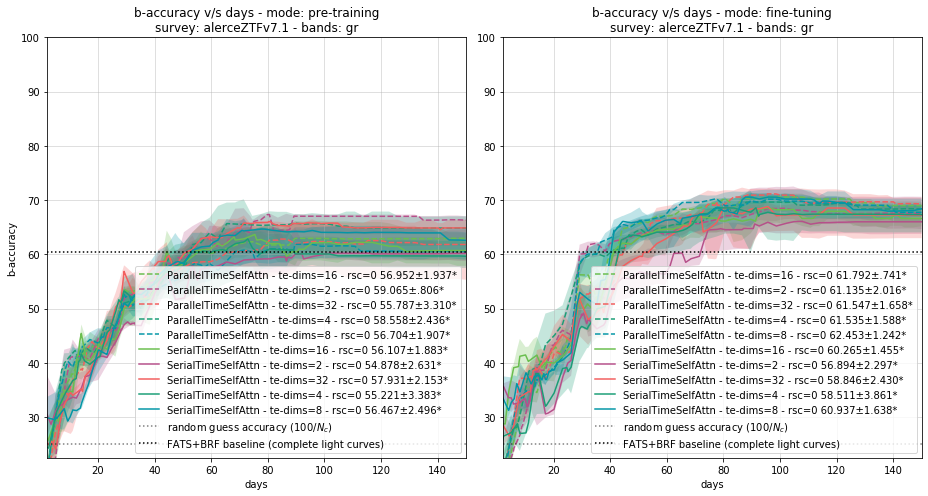

In [25]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'te-dims',
    'rsc',
]
kwargs = {
    'label_keys':label_keys,
}
metric_name = 'b-accuracy' # b-accuracy b-f1score
plot_metric(rootdir, metric_name, new_model_names, baselines_dict.get(cset_name, None), **kwargs)

In [26]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_df_table
from flamingchoripan.latex.latex_tables import LatexTable

kwargs = {
    'arch_modes':['Parallel'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
query_key = 'te-dims'
query_values = [str(i) for i in [2, 4, 8, 16, 32]]
info_df = get_df_table(rootdir, metric_names, new_model_names, day_to_metric, query_key, query_values, **kwargs)

latex_kwargs = {
    'caption':f'{query_key} {day_to_metric}',
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[1][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[2][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=4°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[4][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=8°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5][5#] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[6][5#] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[7][5#] mdl=SerialT

,Parallel-2,Parallel-4,Parallel-8,Parallel-16,Parallel-32
metric=b-accuracy$|^{150}$°training-mode=pre-training,65.202±2.013,64.549±3.153,61.854±1.867,61.736±2.545,60.458±5.150
metric=b-accuracy$|_{2}^{150}$°training-mode=pre-training,59.065±.806,58.558±2.436,56.704±1.907,56.952±1.937,55.787±3.310
metric=b-f1score$|^{150}$°training-mode=pre-training,.491±.047,.493±.021,.482±.017,.478±.046,.492±.035
metric=b-f1score$|_{2}^{150}$°training-mode=pre-training,.445±.035,.440±.016,.435±.019,.436±.039,.447±.018
metric=b-gmean$|^{150}$°training-mode=pre-training,.750±.015,.745±.022,.728±.013,.725±.022,.717±.040
metric=b-gmean$|_{2}^{150}$°training-mode=pre-training,.700±.006,.693±.019,.685±.013,.680±.019,.672±.023
metric=b-xentropy$|^{150}$°training-mode=pre-training,.975±.062,.985±.048,.992±.069,.980±.030,1.013±.058
metric=b-xentropy$|_{2}^{150}$°training-mode=pre-training,1.117±.043,1.140±.038,1.140±.086,1.117±.023,1.180±.060
metric=b-accuracy$|^{150}$°training-mode=fine-tuning,67.596±3.337,67.606±2.600,68.531±1.552,69.212±.560,69.383±1.256
metric=b-accuracy$|_{2}^{150}$°training-mode=fine-tuning,61.135±2.016,61.535±1.588,62.453±1.242,61.792±.741,61.547±1.658


# mse v/s days

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_mse

plot_mse(rootdir, new_model_names)

# f1score vs mse

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_f1score_mse

plot_f1score_mse(root_folder)

# Temporal encoding

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_te_scores

plot_te_scores(root_folder, error_scale=1.5)

# Precision & recall

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs
from src.results.plots import plot_precision_recall_classes

def interact_f(model_name):
    return plot_precision_recall_classes(root_folder, model_name)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
interact(interact_f, model_name=model_names)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.plots import plot_training_losses

plot_training_losses(root_folder)

# metrics & training times table

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_days

target_days = [15, 30, 60]
latex_table_metrics_days(root_folder, target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_mean

latex_table_metrics_mean(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_parameters

latex_table_parameters(root_folder)

# confusion matrix plot

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import plot_cm

def interact_f(model_name, target_day):
    return plot_cm(root_folder, model_name, target_day)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days'][::-1]
interact(interact_f, model_name=model_names, target_day=target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import animation_cm

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days']
animation_cm(root_folder, model_names[0], target_days)